In [1]:
import requests
from bs4 import BeautifulSoup as soup
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from highlight_text import ax_text,fig_text
import mplsoccer

In [2]:
# PLAYER 1 ID IN UNDERSTAT IS 2371 (Ronaldo)
url ='https://understat.com/player/2371'
html = requests.get(url)
parse_soup = soup(html.content,'lxml')
scripts = parse_soup.find_all('script')
strings = scripts[3].string
ind_start = strings.index("('")+2
ind_end = strings.index("')")
json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)
x = []
y = []
xg = []
result = []
season = []
for i,_ in enumerate(data):
    for key in data[i]:
        if key=='X':
            x.append(data[i][key])
        if key=='Y':
            y.append(data[i][key])
        if key=='xG':
            xg.append(data[i][key])
        if key=='result':
            result.append(data[i][key])
        if key=='season':
            season.append(data[i][key])
columns = ['X','Y','xG','Result','Season']
df_understat = pd.DataFrame([x, y, xg, result, season], index=columns)
df_understat = df_understat.T
df_understat = df_understat.apply(pd.to_numeric,errors='ignore')

In [3]:
# PLAYER 2 ID IN UNDERSTAT IS 2097 (Messi)
url_2 ='https://understat.com/player/2097'
html_2 = requests.get(url_2)
parse_soup_2 = soup(html_2.content,'lxml')
scripts_2 = parse_soup_2.find_all('script')
strings_2 = scripts_2[3].string
ind_start_2 = strings_2.index("('")+2
ind_end_2 = strings_2.index("')")
json_data_2 = strings_2[ind_start_2:ind_end_2]
json_data_2 = json_data_2.encode('utf8').decode('unicode_escape')
data_2 = json.loads(json_data_2)
x = []
y = []
xg = []
result = []
season = []
for i,_ in enumerate(data_2):
    for key in data_2[i]:
        if key=='X':
            x.append(data_2[i][key])
        if key=='Y':
            y.append(data_2[i][key])
        if key=='xG':
            xg.append(data_2[i][key])
        if key=='result':
            result.append(data_2[i][key])
        if key=='season':
            season.append(data_2[i][key])
columns = ['X','Y','xG','Result','Season']
df_understat_2 = pd.DataFrame([x, y, xg, result, season], index=columns)
df_understat_2 = df_understat_2.T
df_understat_2 = df_understat_2.apply(pd.to_numeric,errors='ignore')

In [4]:
df_understat['X'] = df_understat['X'].apply(lambda x:x*100)
df_understat['Y'] = df_understat['Y'].apply(lambda x:x*100)

df_understat_2['X'] = df_understat_2['X'].apply(lambda x:x*100)
df_understat_2['Y'] = df_understat_2['Y'].apply(lambda x:x*100)

In [5]:
def readfromhtml(filepath):
    df = pd.read_html(filepath)[0]
    column_lst = list(df.columns)
    for index in range(len(column_lst)):
        column_lst[index] = column_lst[index][1]
    df.columns = column_lst
    df.drop(df[df['Player'] == 'Player'].index, inplace=True)
    df = df.fillna('0')
    df.set_index('Rk', drop=True, inplace=True)
    try:
        df['Comp'] = df['Comp'].apply(lambda x: ' '.join(x.split()[1:]))
        df['Nation'] = df['Nation'].astype(str)
        df['Nation'] = df['Nation'].apply(lambda x: x.split()[-1])
    except:
        print('Error in uploading file:' + filepath)
    finally:
        df = df.apply(pd.to_numeric, errors='ignore')
        return df
    
df_fbref = readfromhtml('https://fbref.com/en/comps/Big5/2020-2021/shooting/players/2020-2021-Big-5-European-Leagues-Stats')

In [6]:
background = '#D6DBD9'
text_color = 'black'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='monospace'
mpl.rcParams['legend.fontsize'] = 15

In [7]:
# SETTING UP THE AXES
fig, ax = plt.subplots(figsize=(12,10))
ax.axis('off')
fig.set_facecolor(background)

In [8]:
#SETTING UP THE MPL AXIS FOR PLAYER 1
pitch = mplsoccer.VerticalPitch(half=True,pitch_type='opta', pitch_color='grass')
ax_opta1 = fig.add_axes((0.07, 0.06, 0.4, 0.4))
ax_opta1.patch.set_facecolor(background)
pitch.draw(ax=ax_opta1)

In [9]:
#NOW PLOTTING PLAYER 1's GOALS IN THE 2020-21 SEASON
df_fil = df_understat.loc[df_understat['Season']==2020]
pitch.scatter(df_fil[df_fil['Result']=='Goal']['X'],df_fil[df_fil['Result']=='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']=='Goal']['xG'])*100, marker='o', alpha=0.9,
              edgecolor='black', facecolor='#6778d0', ax=ax_opta1, label='Goal')

In [10]:
#PLOTTING OTHER SHOTS
pitch.scatter(df_fil[df_fil['Result']!='Goal']['X'],df_fil[df_fil['Result']!='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']!='Goal']['xG'])*100, marker='o', alpha=0.6,
              edgecolor='black', facecolor='grey', ax=ax_opta1)

In [11]:
# ADDING THE LEGEND
ax_opta1.legend(loc='lower right').get_texts()[0].set_color("black")

In [12]:
ax_opta1.text(25,61,'GOALS : '+str(len(df_fil[df_fil['Result']=='Goal'])), weight='bold', size=10)
ax_opta1.text(25,64,f"xG : {round(sum(df_fil['xG']),2)}", weight='bold', size=10)
ax_opta1.text(25,58,'SHOTS : '+str(len(df_fil)), weight='bold', size=10)
ax_opta1.text(85, 60, 'Ronaldo', weight='bold', size=15)

Text(85, 60, 'Ronaldo')

In [13]:
# DOING THE SAME FOR PLAYER 2's SEASON TOO
ax_opta2 = fig.add_axes((0.52, 0.06, 0.4, 0.4))
ax_opta2.patch.set_facecolor(background)
pitch.draw(ax=ax_opta2)
#PLOTTING OTHER SHOTS
df_fil = df_understat_2.loc[df_understat_2['Season']==2020]
pitch.scatter(df_fil[df_fil['Result']!='Goal']['X'],df_fil[df_fil['Result']!='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']!='Goal']['xG'])*100, marker='o', alpha=0.6,
              edgecolor='black', facecolor='grey', ax=ax_opta2)
#NOW PLOTTING THE GOALS IN THE 2020-21 SEASON
pitch.scatter(df_fil[df_fil['Result']=='Goal']['X'],df_fil[df_fil['Result']=='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']=='Goal']['xG'])*100, marker='o', alpha=0.9,
              edgecolor='black', facecolor='#6778d0', ax=ax_opta2, label='Goal')
# ADDING THE LEGEND
ax_opta2.legend(loc='lower right').get_texts()[0].set_color("black")
ax_opta2.text(25,61,'GOALS : '+str(len(df_fil[df_fil['Result']=='Goal'])), weight='bold', size=10)
ax_opta2.text(25,64,f"xG : {round(sum(df_fil['xG']),2)}", weight='bold', size=10)
ax_opta2.text(25,58,'SHOTS : '+str(len(df_fil)), weight='bold', size=10)
ax_opta2.text(85, 60, 'Messi', weight='bold', size=15)

Text(85, 60, 'Messi')

In [14]:
# NOW PLOTTING THE SCATTERPLOT
ax_scatter = fig.add_axes([0.07,0.57,0.4,0.35])
ax_scatter.patch.set_facecolor(background)

In [15]:
# SETTING UP THE X AND Y OF THE SCATTERPLOT
no_90s = 10
df_fil = df_fbref[df_fbref['90s']>=no_90s]
df_fil = df_fil[df_fil['Pos'].apply(lambda x: x in ['FW','MF,FW','FW,MF'])]
x,y = (df_fil['xG']/df_fil['90s']).to_list(), (df_fil['Gls']/df_fil['90s']).to_list()
ax_scatter.scatter(x,y,alpha=0.3,c='#EF8804')

In [16]:
# NOW FILTERING CRISTIANO RONALDO'S DATA
df_player = df_fil[df_fil['Player']=='Cristiano Ronaldo']
ax_scatter.scatter(df_player['xG']/df_player['90s'], df_player['Gls']/df_player['90s'], c='blue')

In [17]:
# ADDING FINISHING TOUCHES TO THE SCATTERPLOT
ax_scatter.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.4)
ax_scatter.set_xlabel('Expected Goals per 90', fontdict = {'fontsize':10, 'weight' : 'bold', 'color':text_color})
ax_scatter.set_ylabel('Goals per 90', fontdict = dict(fontsize = 10, weight = 'bold',color=text_color))

Text(43.59722222222223, 0.5, 'Goals per 90')

In [18]:
# NOW PLOTTING THE SCATTERPLOT
ax_scatter = fig.add_axes([0.52,0.57,0.4,0.35])
ax_scatter.patch.set_facecolor(background)

# SETTING UP THE X AND Y OF THE SCATTERPLOT
no_90s = 10
df_fil = df_fbref[df_fbref['90s']>=no_90s]
df_fil = df_fil[df_fil['Pos'].apply(lambda x: x in ['FW','MF,FW','FW,MF'])]
x,y = (df_fil['xG']/df_fil['90s']).to_list(), (df_fil['Gls']/df_fil['90s']).to_list()
ax_scatter.scatter(x,y,alpha=0.3,c='#EF8804')

# NOW FILTERING PLAYER 2'S DATA
df_player = df_fil[df_fil['Player']=='Lionel Messi']
ax_scatter.scatter(df_player['xG']/df_player['90s'], df_player['Gls']/df_player['90s'], c='blue')

# ADDING FINISHING TOUCHES TO THE SCATTERPLOT
ax_scatter.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.4)
ax_scatter.set_xlabel('Expected Goals per 90', fontdict = {'fontsize':10, 'weight' : 'bold', 'color':text_color})
ax_scatter.set_ylabel('Goals per 90', fontdict = dict(fontsize = 10, weight = 'bold',color=text_color))

Text(0, 0.5, 'Goals per 90')

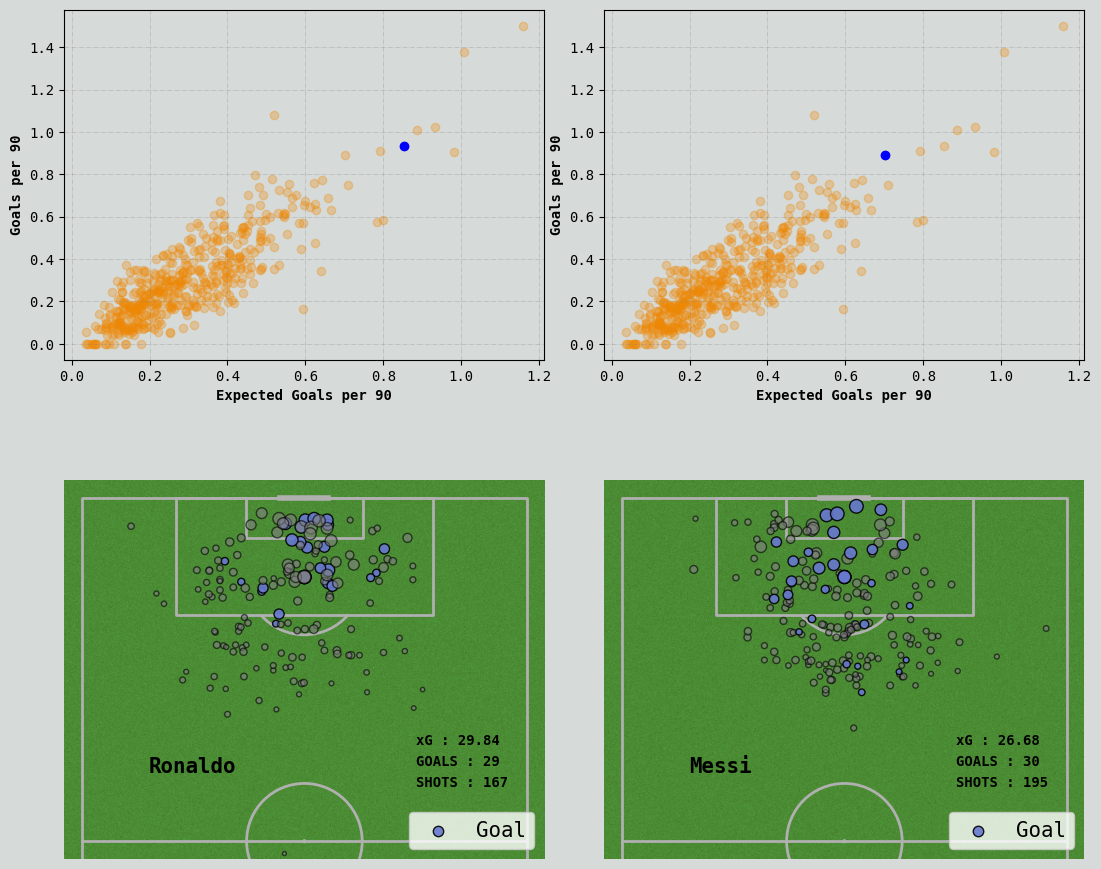

In [19]:
plt.show()